In [1]:
! pip install easyocr


     |████████████████████████████████| 63.2MB 50kB/s 


In [2]:
import easyocr
reader = easyocr.Reader(['en', 'hi'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [4]:
result = reader.readtext('sample_data/My Post-min.png',paragraph=True)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
result

[[[[501, 77], [779, 77], [779, 626], [501, 626]], 'कह परेशां हा रहे हाो'],
 [[[1081, 683], [1277, 683], [1277, 719], [1081, 719]], 'Sp Adobe Spark']]

In [6]:
import cv2
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

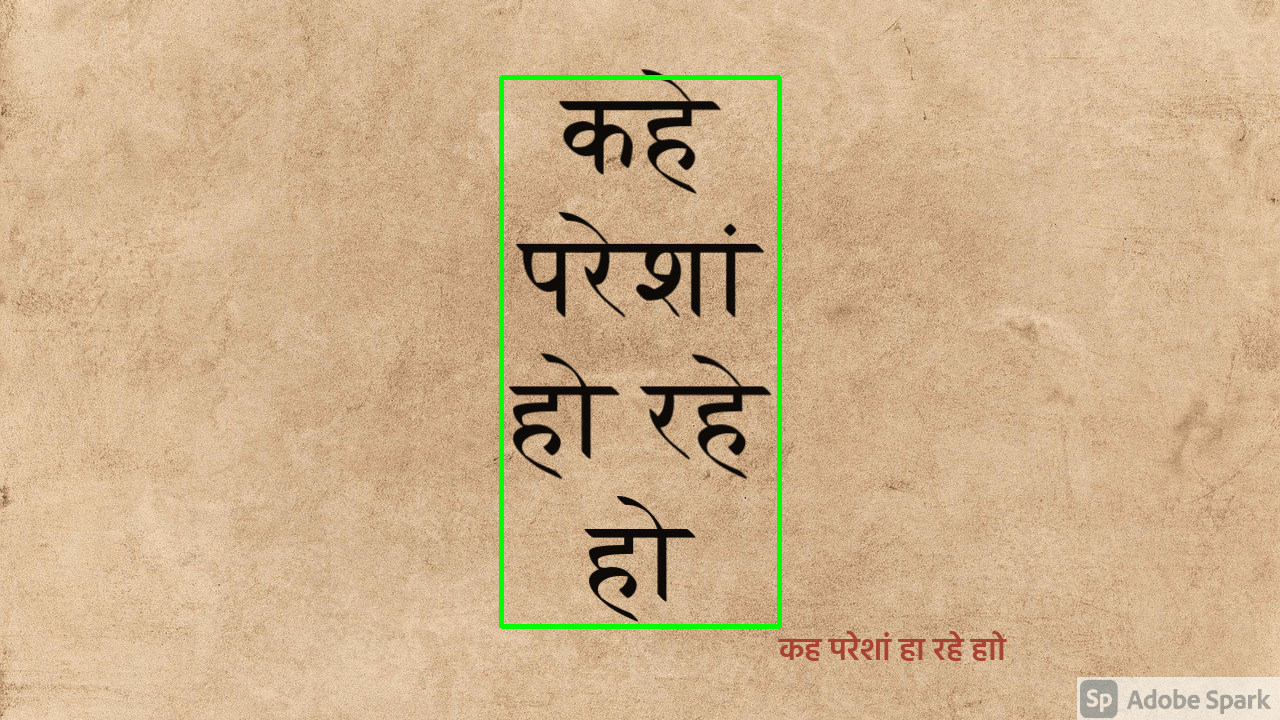

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFont, ImageDraw, Image
b,g,r,a = 50,66,168,0
fontpath = "sample_data/Hind-SemiBold.ttf"
font = ImageFont.truetype(fontpath, 32)
img = cv2.imread('sample_data/My Post-min.png',cv2.COLOR_BGR2RGB)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)
draw.text(bottom_right,  "कह परेशां हा रहे हाो", font = font, fill = (b, g, r, a))
img = np.array(img_pil)

img2 = cv2.putText(img,' ', bottom_right, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1, cv2.LINE_AA)

#plt.figure(figsize=(10,10))
#plt.imshow(img2)
#plt.show()
cv2_imshow(img2)

In [7]:
result = reader.readtext('sample_data/test_pan.jpg',paragraph=True)

In [39]:
result

[[[[14, 16], [431, 16], [431, 148], [14, 148]],
  'आयकर विभाग INCONE TAX DEPARTILNT'],
 [[[628, 31], [982, 31], [982, 150], [628, 150]], 'भारत सरकार GOVT OF INDIA'],
 [[[42, 194], [202, 194], [202, 226], [42, 226]], 'TYOUR NAME]'],
 [[[773, 214], [899, 214], [899, 298], [773, 298]], 'शास्त सकार'],
 [[[44, 258], [248, 258], [248, 290], [44, 290]], "[FATHER'S NAMEJ"],
 [[[54, 328], [230, 328], [230, 356], [54, 356]], 'DATE OF BIRTH'],
 [[[27, 377], [390, 377], [390, 452], [27, 452]],
  'Permanent /ccount Number ABCDE12३4F'],
 [[[738, 384], [876, 384], [876, 496], [738, 496]], 'Your Photo'],
 [[[33, 509], [243, 509], [243, 547], [33, 547]], 'Your Signature'],
 [[[20, 571], [157, 571], [157, 619], [20, 619]], 'Signature']]

In [40]:
import cv2
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

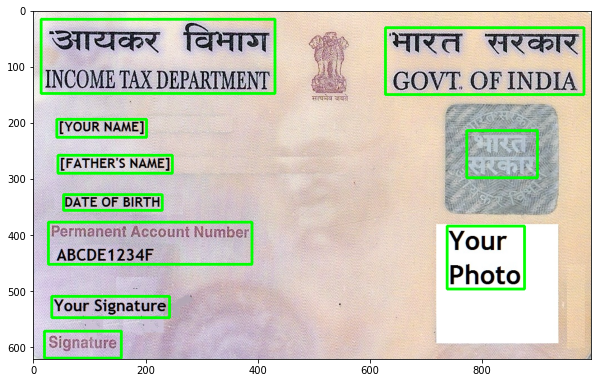

In [41]:
img = cv2.imread('sample_data/test_pan.jpg')
spacer = 300
font = cv2.FONT_HERSHEY_SIMPLEX
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    #img = cv2.putText(img,text,(20,spacer), font, 0.5,(255,255,0),2,cv2.LINE_AA)
    spacer+=15
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [42]:
for i in result:
  print(i[1])

आयकर विभाग INCONE TAX DEPARTILNT
भारत सरकार GOVT OF INDIA
TYOUR NAME]
शास्त सकार
[FATHER'S NAMEJ
DATE OF BIRTH
Permanent /ccount Number ABCDE12३4F
Your Photo
Your Signature
Signature


In [43]:
print(text)

Signature
